- Realizar deploy da base dados em anexo em um bucket/GCP via colab
- Consumir a base armazenada no bucket via colab e Realizar ETL ou ELT com pandas e/ou pyspark
- Após tratamento, criar um banco de dados chamado Petrobras, tabela balanco e com todas as colunas do dataframe
- Inserir os dados do DataFrame via colab no banco de dados MySQL.

In [ ]:
# Instalar bibliotecas
!pip install pandas google-cloud-storage mysql-connector-python

In [ ]:
# Importar bibliotecas
import pandas as pd
from google.cloud import storage
import mysql.connector
from mysql.connector import Error

In [ ]:
# Autenticar a conta do Google Cloud
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Configurar o cliente do Google Cloud Storage
client = storage.Client()
bucket_name = 'projeto01_soulcode'
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/balanco_petro.xlsx'

In [ ]:
# Função para fazer upload de arquivos para o bucket GCS
def upload_to_gcs(bucket_name, file_path):
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob('projeto01_soulcode/balanco_petro.xlsx')
    blob.upload_from_filename(file_path)
    print(f'Arquivo {file_path} carregado para {bucket_name}/projeto01/balanco_petro.xlsx')

upload_to_gcs(bucket_name, file_path)

Arquivo /content/drive/MyDrive/Colab Notebooks/Datasets/balanco_petro.xlsx carregado para projeto01_soulcode/projeto01/balanco_petro.xlsx


In [ ]:
# Função para ler o arquivo CSV do GCS para um DataFrame
def read_excel_from_gcs(bucket_name, file_name):
    client = storage.Client()
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(file_name)
    local_file_path = '/content/balanco_petro.xlsx'
    blob.download_to_filename(local_file_path)
    df = pd.read_excel(local_file_path) #Balanço Patrimonial

    return df

bucket_name = 'projeto01_soulcode'
file_name = 'projeto01_soulcode/balanco_petro.xlsx'

df = read_excel_from_gcs(bucket_name, file_name)

# Exibe os tipos de dados dos DataFrames
print("Tipos de dados em df - Balanço Patrimonial:")
print(df.dtypes)

print(df.info())
print(df.describe())

df.head()

Tipos de dados em df - Balanço Patrimonial:
XLSWrite 1.34 Copyright(c) 1999,2000 Axolot Data    object
Balanço Patrimonial - PETROBRAS                     object
Unnamed: 2                                          object
Unnamed: 3                                          object
Unnamed: 4                                          object
                                                     ...  
Unnamed: 56                                         object
Unnamed: 57                                         object
Unnamed: 58                                         object
Unnamed: 59                                         object
Unnamed: 60                                         object
Length: 61, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 61 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   XLSWrite 1.34 Cop

,"XLSWrite 1.34 Copyright(c) 1999,2000 Axolot Data",Balanço Patrimonial - PETROBRAS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,31/03/2009,30/06/2009,30/09/2009,31/12/2009,31/03/2010,30/06/2010,30/09/2010,31/12/2010,31/03/2011,30/06/2011,...,31/12/2021,31/03/2022,30/06/2022,30/09/2022,31/12/2022,31/03/2023,30/06/2023,30/09/2023,31/12/2023,31/03/2024
1,Ativo Total,305265344.512,333789528.064,345607274.496,365998080,382029856.768,507697037.312,519970029.568,544945274.88,554583457.792,...,972950994.944,998662012.928,1004753977.344,947574013.952,976708960.256,978576998.4,990459002.88,1025495990.272,1050887979.008,1067292033.024
2,Ativo Circulante,57621536.768,75719057.408,76674015.232,74459103.232,71980236.8,111415033.856,106685161.472,120036376.576,119493476.352,...,168247001.088,199511998.464,224784990.208,159327010.816,163051995.136,157193994.24,136816001.024,147311001.6,157079011.328,165964005.376
3,Caixa e Equivalentes de Caixa,10072162.304,30088286.208,28795713.536,26951325.696,24209866.752,47291932.672,30323259.392,43344818.176,34672615.424,...,58410000.384,81601003.52,85310996.48,23650000.896,41722998.784,52276998.144,49882001.408,60642000.896,61612998.656,57689001.984
4,Aplicações Financeiras,0,0,0,0,0,0,26017296.384,20015771.648,24969263.104,...,3630000.128,5967000.064,14956999.68,13038000.128,14469999.616,14629000.192,11102999.552,6504999.936,13649999.872,24071999.488


- Consumir a base armazenada no bucket via colab e Realizar ETL ou ELT com pandas e/ou pyspark

**PASSOS PARA TRATAMENTO DA BASE DE DADOS**

1 - Conversão dos valores no excel para número;

2 - Verificação de valores nulos e duplicatas;

3 - Remoção de duplicatas;

4 - Substituição de nulos por zero;

5 - Renomear a coluna de datas para Data;

6 - Fazer a transposta da matriz/base de dados para que as linhas se tornem colunas;

7 - Arrumar o index e o cabeçalho da  base de dados;

8 - Conversão da coluna de Data do formato de object para date;

9 - Remoção de colunas duplicatas;

10 - Conversão dos valores de object para float64;

11 - Normalização dos nomes das colunas para remover espaços e acentos;

In [ ]:
# Verificando se há valores ausentes
print(df.isna().sum())

#Verificando se há duplicatas
print(df.duplicated().sum()) #duas duplicatas

XLSWrite 1.34 Copyright(c) 1999,2000 Axolot Data    0
Balanço Patrimonial - PETROBRAS                     0
Unnamed: 2                                          0
Unnamed: 3                                          0
Unnamed: 4                                          0
                                                   ..
Unnamed: 56                                         0
Unnamed: 57                                         0
Unnamed: 58                                         0
Unnamed: 59                                         0
Unnamed: 60                                         0
Length: 61, dtype: int64
2


In [ ]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [ ]:
#Substituir nulos por zero
df_substituido = df.fillna(0)

In [ ]:
#Substituindo o valor 31/03/2009 por Data - para que esse possa ser o título da coluna após a transposição
df_substituido.iloc[0, 0] = 'Data'
df_substituido.head()

,"XLSWrite 1.34 Copyright(c) 1999,2000 Axolot Data",Balanço Patrimonial - PETROBRAS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Data,30/06/2009,30/09/2009,31/12/2009,31/03/2010,30/06/2010,30/09/2010,31/12/2010,31/03/2011,30/06/2011,...,31/12/2021,31/03/2022,30/06/2022,30/09/2022,31/12/2022,31/03/2023,30/06/2023,30/09/2023,31/12/2023,31/03/2024
1,Ativo Total,305265344.512,333789528.064,345607274.496,365998080,382029856.768,507697037.312,519970029.568,544945274.88,554583457.792,...,972950994.944,998662012.928,1004753977.344,947574013.952,976708960.256,978576998.4,990459002.88,1025495990.272,1050887979.008,1067292033.024
2,Ativo Circulante,57621536.768,75719057.408,76674015.232,74459103.232,71980236.8,111415033.856,106685161.472,120036376.576,119493476.352,...,168247001.088,199511998.464,224784990.208,159327010.816,163051995.136,157193994.24,136816001.024,147311001.6,157079011.328,165964005.376
3,Caixa e Equivalentes de Caixa,10072162.304,30088286.208,28795713.536,26951325.696,24209866.752,47291932.672,30323259.392,43344818.176,34672615.424,...,58410000.384,81601003.52,85310996.48,23650000.896,41722998.784,52276998.144,49882001.408,60642000.896,61612998.656,57689001.984
4,Aplicações Financeiras,0,0,0,0,0,0,26017296.384,20015771.648,24969263.104,...,3630000.128,5967000.064,14956999.68,13038000.128,14469999.616,14629000.192,11102999.552,6504999.936,13649999.872,24071999.488


In [ ]:
# Transformar colunas em linhas pelo método transpose em pandas
df_transposto = df_substituido.transpose()
df_transposto.head()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
"XLSWrite 1.34 Copyright(c) 1999,2000 Axolot Data",Data,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes
Balanço Patrimonial - PETROBRAS,30/06/2009,305265344.512,57621536.768,10072162.304,0,14555268.096,19674548.224,0,0,0,...,3893927.936,149847965.696,78966685.696,514856.992,9920,58865377.28,10918406.144,572716.032,0,0
Unnamed: 2,30/09/2009,333789528.064,75719057.408,30088286.208,0,13643311.104,20635084.8,0,0,0,...,4627491.84,155391688.704,78966685.696,514856.992,9718,58866671.616,16466363.392,567398.976,0,0
Unnamed: 3,31/12/2009,345607274.496,76674015.232,28795713.536,0,13984270.336,21424652.288,0,0,0,...,1610167.04,159464587.264,78966685.696,514856.992,350,79521013.76,0,461687.008,0,0
Unnamed: 4,31/03/2010,365998080,74459103.232,26951325.696,0,16200354.816,20030609.408,0,0,0,...,2932711.936,170299080.704,78966685.696,514856.992,0,84879695.872,5971459.072,-33617,0,0


In [ ]:
#Corrigir o index
df_transposto.reset_index(drop = True, inplace = True)
df_transposto.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,Data,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes
1,30/06/2009,305265344.512,57621536.768,10072162.304,0,14555268.096,19674548.224,0,0,0,...,3893927.936,149847965.696,78966685.696,514856.992,9920,58865377.28,10918406.144,572716.032,0,0
2,30/09/2009,333789528.064,75719057.408,30088286.208,0,13643311.104,20635084.8,0,0,0,...,4627491.84,155391688.704,78966685.696,514856.992,9718,58866671.616,16466363.392,567398.976,0,0
3,31/12/2009,345607274.496,76674015.232,28795713.536,0,13984270.336,21424652.288,0,0,0,...,1610167.04,159464587.264,78966685.696,514856.992,350,79521013.76,0,461687.008,0,0
4,31/03/2010,365998080,74459103.232,26951325.696,0,16200354.816,20030609.408,0,0,0,...,2932711.936,170299080.704,78966685.696,514856.992,0,84879695.872,5971459.072,-33617,0,0


In [ ]:
df_transposto.columns = df_transposto.iloc[0]  # Definindo a primeira linha como cabeçalho
df_transposto = df_transposto[1:]  # Removendo a primeira linha que virou o cabeçalho
df_transposto.reset_index(drop= True, inplace=True)  # Redefinindo o índice do df
df_transposto.head()

,Data,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes
0,30/06/2009,305265344.512,57621536.768,10072162.304,0,14555268.096,19674548.224,0,0,0,...,3893927.936,149847965.696,78966685.696,514856.992,9920,58865377.28,10918406.144,572716.032,0,0
1,30/09/2009,333789528.064,75719057.408,30088286.208,0,13643311.104,20635084.8,0,0,0,...,4627491.84,155391688.704,78966685.696,514856.992,9718,58866671.616,16466363.392,567398.976,0,0
2,31/12/2009,345607274.496,76674015.232,28795713.536,0,13984270.336,21424652.288,0,0,0,...,1610167.04,159464587.264,78966685.696,514856.992,350,79521013.76,0,461687.008,0,0
3,31/03/2010,365998080,74459103.232,26951325.696,0,16200354.816,20030609.408,0,0,0,...,2932711.936,170299080.704,78966685.696,514856.992,0,84879695.872,5971459.072,-33617,0,0
4,30/06/2010,382029856.768,71980236.8,24209866.752,0,15961581.568,19680464.896,0,0,0,...,2932856.064,176974135.296,85108547.584,0,0,79252692.992,12494328.832,118554,0,0


In [ ]:
# Transformar a coluna 'Data' para datetime
df_transposto['Data'] = pd.to_datetime(df_transposto['Data'], format='%Y-%m-%d', errors='coerce')
print(df_transposto.dtypes)
df_transposto.head()

0
Data                                                            datetime64[ns]
Ativo Total                                                             object
Ativo Circulante                                                        object
Caixa e Equivalentes de Caixa                                           object
Aplicações Financeiras                                                  object
Contas a Receber                                                        object
Estoques                                                                object
Ativos Biológicos                                                       object
Tributos a Recuperar                                                    object
Despesas Antecipadas                                                    object
Outros Ativos Circulantes                                               object
Ativo Realizável a Longo Prazo                                          object
Aplicações Financeiras Avaliadas a Valor Justo    

,Data,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes
0,2009-06-30,305265344.512,57621536.768,10072162.304,0,14555268.096,19674548.224,0,0,0,...,3893927.936,149847965.696,78966685.696,514856.992,9920,58865377.28,10918406.144,572716.032,0,0
1,2009-09-30,333789528.064,75719057.408,30088286.208,0,13643311.104,20635084.8,0,0,0,...,4627491.84,155391688.704,78966685.696,514856.992,9718,58866671.616,16466363.392,567398.976,0,0
2,2009-12-31,345607274.496,76674015.232,28795713.536,0,13984270.336,21424652.288,0,0,0,...,1610167.04,159464587.264,78966685.696,514856.992,350,79521013.76,0,461687.008,0,0
3,2010-03-31,365998080,74459103.232,26951325.696,0,16200354.816,20030609.408,0,0,0,...,2932711.936,170299080.704,78966685.696,514856.992,0,84879695.872,5971459.072,-33617,0,0
4,2010-06-30,382029856.768,71980236.8,24209866.752,0,15961581.568,19680464.896,0,0,0,...,2932856.064,176974135.296,85108547.584,0,0,79252692.992,12494328.832,118554,0,0


In [ ]:
df_transposto = df_transposto.loc[:, ~df_transposto.columns.duplicated()] #removendo a coluna duplicada contas a receber e outros
print(df_transposto)

0        Data     Ativo Total Ativo Circulante Caixa e Equivalentes de Caixa  \
0  2009-06-30   305265344.512     57621536.768                  10072162.304   
1  2009-09-30   333789528.064     75719057.408                  30088286.208   
2  2009-12-31   345607274.496     76674015.232                  28795713.536   
3  2010-03-31       365998080     74459103.232                  26951325.696   
4  2010-06-30   382029856.768       71980236.8                  24209866.752   
5  2010-09-30   507697037.312    111415033.856                  47291932.672   
6  2010-12-31   519970029.568    106685161.472                  30323259.392   
7  2011-03-31    544945274.88    120036376.576                  43344818.176   
8  2011-06-30   554583457.792    119493476.352                  34672615.424   
9  2011-09-30   582124896.256    120493400.064                  33659195.392   
10 2011-12-31   599149969.408    121163677.696                  35747241.984   
11 2012-03-31   615818461.184    1263735

In [ ]:
# Converter os valores das colunas de object para float a partir da coluna ativo_total
print(df_transposto.index)
print(df_transposto.columns)

for col in df_transposto.columns[1:]:
    # Converte os valores para numérico
    df_transposto[col] = pd.to_numeric(df_transposto[col], errors='coerce')

print(df_transposto.dtypes)
df_transposto.head()

RangeIndex(start=0, stop=60, step=1)
Index(['Data', 'Ativo Total', 'Ativo Circulante',
       'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras',
       'Contas a Receber', 'Estoques', 'Ativos Biológicos',
       'Tributos a Recuperar', 'Despesas Antecipadas',
       'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo',
       'Aplicações Financeiras Avaliadas a Valor Justo',
       'Aplicações Financeiras Avaliadas ao Custo Amortizado',
       'Tributos Diferidos', 'Créditos com Partes Relacionadas',
       'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado',
       'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante',
       'Obrigações Sociais e Trabalhistas', 'Fornecedores',
       'Obrigações Fiscais', 'Empréstimos e Financiamentos',
       'Passivos com Partes Relacionadas', 'Dividendos e JCP a Pagar',
       'Outros', 'Provisões',
       'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
       'Passivo Não Circulante', 'Adiant

,Data,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes
0,2009-06-30,3.052653e+08,5.762154e+07,1.007216e+07,0.0,1.455527e+07,1.967455e+07,0,0.0,0.0,...,3893927.936,1.498480e+08,7.896669e+07,514856.992,9920,5.886538e+07,1.091841e+07,572716.032,0.0,0.0
1,2009-09-30,3.337895e+08,7.571906e+07,3.008829e+07,0.0,1.364331e+07,2.063508e+07,0,0.0,0.0,...,4627491.840,1.553917e+08,7.896669e+07,514856.992,9718,5.886667e+07,1.646636e+07,567398.976,0.0,0.0
2,2009-12-31,3.456073e+08,7.667402e+07,2.879571e+07,0.0,1.398427e+07,2.142465e+07,0,0.0,0.0,...,1610167.040,1.594646e+08,7.896669e+07,514856.992,350,7.952101e+07,0.000000e+00,461687.008,0.0,0.0
3,2010-03-31,3.659981e+08,7.445910e+07,2.695133e+07,0.0,1.620035e+07,2.003061e+07,0,0.0,0.0,...,2932711.936,1.702991e+08,7.896669e+07,514856.992,0,8.487970e+07,5.971459e+06,-33617.000,0.0,0.0
4,2010-06-30,3.820299e+08,7.198024e+07,2.420987e+07,0.0,1.596158e+07,1.968046e+07,0,0.0,0.0,...,2932856.064,1.769741e+08,8.510855e+07,0.000,0,7.925269e+07,1.249433e+07,118554.000,0.0,0.0


In [ ]:
#Normalizando nomes das colunas

import unicodedata

def remover_acentos(texto):
    return ''.join(
        char for char in unicodedata.normalize('NFKD', texto)
        if not unicodedata.combining(char)
    )
df_transposto.columns = [remover_acentos(col).replace(' ', '_') for col in df_transposto.columns]

df_transposto.head()


,Data,Ativo_Total,Ativo_Circulante,Caixa_e_Equivalentes_de_Caixa,Aplicacoes_Financeiras,Contas_a_Receber,Estoques,Ativos_Biologicos,Tributos_a_Recuperar,Despesas_Antecipadas,...,Participacao_dos_Acionistas_Nao_Controladores,Patrimonio_Liquido,Capital_Social_Realizado,Reservas_de_Capital,Reservas_de_Reavaliacao,Reservas_de_Lucros,Lucros/Prejuizos_Acumulados,Ajustes_de_Avaliacao_Patrimonial,Ajustes_Acumulados_de_Conversao,Outros_Resultados_Abrangentes
0,2009-06-30,3.052653e+08,5.762154e+07,1.007216e+07,0.0,1.455527e+07,1.967455e+07,0,0.0,0.0,...,3893927.936,1.498480e+08,7.896669e+07,514856.992,9920,5.886538e+07,1.091841e+07,572716.032,0.0,0.0
1,2009-09-30,3.337895e+08,7.571906e+07,3.008829e+07,0.0,1.364331e+07,2.063508e+07,0,0.0,0.0,...,4627491.840,1.553917e+08,7.896669e+07,514856.992,9718,5.886667e+07,1.646636e+07,567398.976,0.0,0.0
2,2009-12-31,3.456073e+08,7.667402e+07,2.879571e+07,0.0,1.398427e+07,2.142465e+07,0,0.0,0.0,...,1610167.040,1.594646e+08,7.896669e+07,514856.992,350,7.952101e+07,0.000000e+00,461687.008,0.0,0.0
3,2010-03-31,3.659981e+08,7.445910e+07,2.695133e+07,0.0,1.620035e+07,2.003061e+07,0,0.0,0.0,...,2932711.936,1.702991e+08,7.896669e+07,514856.992,0,8.487970e+07,5.971459e+06,-33617.000,0.0,0.0
4,2010-06-30,3.820299e+08,7.198024e+07,2.420987e+07,0.0,1.596158e+07,1.968046e+07,0,0.0,0.0,...,2932856.064,1.769741e+08,8.510855e+07,0.000,0,7.925269e+07,1.249433e+07,118554.000,0.0,0.0


In [ ]:
df_transposto.columns = df_transposto.columns.str.upper()
df_transposto.rename(columns={'PASSIVOS_SOBRE_ATIVOS_NAO-CORRENTES_A_VENDA_E_DESCONTINUADOS': 'PASSIVOS_SOBRE_ATIVOS_NAO_CORRENTES_A_VENDA_E_DESCONTINUADOS'}, inplace=True)
df_transposto.rename(columns={'LUCROS/PREJUIZOS_ACUMULADOS': 'LUCROS_PREJUIZOS_ACUMULADOS'}, inplace=True)

df_transposto.head()

,DATA,ATIVO_TOTAL,ATIVO_CIRCULANTE,CAIXA_E_EQUIVALENTES_DE_CAIXA,APLICACOES_FINANCEIRAS,CONTAS_A_RECEBER,ESTOQUES,ATIVOS_BIOLOGICOS,TRIBUTOS_A_RECUPERAR,DESPESAS_ANTECIPADAS,...,PARTICIPACAO_DOS_ACIONISTAS_NAO_CONTROLADORES,PATRIMONIO_LIQUIDO,CAPITAL_SOCIAL_REALIZADO,RESERVAS_DE_CAPITAL,RESERVAS_DE_REAVALIACAO,RESERVAS_DE_LUCROS,LUCROS_PREJUIZOS_ACUMULADOS,AJUSTES_DE_AVALIACAO_PATRIMONIAL,AJUSTES_ACUMULADOS_DE_CONVERSAO,OUTROS_RESULTADOS_ABRANGENTES
0,2009-06-30,3.052653e+08,5.762154e+07,1.007216e+07,0.0,1.455527e+07,1.967455e+07,0,0.0,0.0,...,3893927.936,1.498480e+08,7.896669e+07,514856.992,9920,5.886538e+07,1.091841e+07,572716.032,0.0,0.0
1,2009-09-30,3.337895e+08,7.571906e+07,3.008829e+07,0.0,1.364331e+07,2.063508e+07,0,0.0,0.0,...,4627491.840,1.553917e+08,7.896669e+07,514856.992,9718,5.886667e+07,1.646636e+07,567398.976,0.0,0.0
2,2009-12-31,3.456073e+08,7.667402e+07,2.879571e+07,0.0,1.398427e+07,2.142465e+07,0,0.0,0.0,...,1610167.040,1.594646e+08,7.896669e+07,514856.992,350,7.952101e+07,0.000000e+00,461687.008,0.0,0.0
3,2010-03-31,3.659981e+08,7.445910e+07,2.695133e+07,0.0,1.620035e+07,2.003061e+07,0,0.0,0.0,...,2932711.936,1.702991e+08,7.896669e+07,514856.992,0,8.487970e+07,5.971459e+06,-33617.000,0.0,0.0
4,2010-06-30,3.820299e+08,7.198024e+07,2.420987e+07,0.0,1.596158e+07,1.968046e+07,0,0.0,0.0,...,2932856.064,1.769741e+08,8.510855e+07,0.000,0,7.925269e+07,1.249433e+07,118554.000,0.0,0.0


- Após tratamento, criar um banco de dados chamado Petrobras, tabela balanco e com todas as colunas do dataframe
- Inserir os dados do DataFrame via colab no banco de dados MySQL.

In [ ]:
# Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'Petrobras'
usuario = 'Patrícia'
senha = 'erchomai#97V'

In [ ]:
# Função para conectar ao banco de dados
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conn = mysql.connector.connect(
            host=servidor,
            user=usuario,
            password=senha,
            database = basededados
        )
        if conn.is_connected():
            print("Conexão bem-sucedida ao MySQL")
            return conn
    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

conexao = conectar_mysql(servidor, basededados, usuario, senha)

Conexão bem-sucedida ao MySQL


In [ ]:
# Função para criar o banco de dados
def criar_banco(conexao, basededados):
    try:
        cursor = conexao.cursor()
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS {basededados}")
        conexao.commit()
        print(f"Banco de dados {basededados} criado ou já existente.")
    except Error as e:
        print(f"Erro ao criar banco de dados: {e}")

criar_banco(conexao, basededados)

Banco de dados Petrobras criado ou já existente.


In [ ]:
# Função para criar a tabela com base no DataFrame
def criar_tabela(conexao, df_transposto):
    cursor = conexao.cursor()
    columns = []
    for col in df_transposto.columns:
        if col == 'DATA':
            columns.append(f"`{col}` DATE")
        else:
            columns.append(f"`{col}` FLOAT")

    columns_str = ', '.join(columns)

    # Criar a tabela
    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS balanco (
        id INT AUTO_INCREMENT PRIMARY KEY,
        {columns_str}
    )
    """
    try:
        cursor.execute(create_table_query)
        conexao.commit()
        print("Tabela criada com sucesso.")
    except Error as e:
        print(f"Erro ao criar tabela: {e}")

criar_tabela(conexao, df_transposto)



Tabela criada com sucesso.


In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# Função para inserir dados do DataFrame na tabela
def inserir_dados(df_transposto, conexao):
    cursor = conexao.cursor()

    # Verificar se o número de colunas na tabela e no DataFrame são iguais
    num_cols = len(df_transposto.columns)

    for _, row in df_transposto.iterrows():
        values = [None if pd.isna(val) else val for val in row]

        # Verificar se o número de valores corresponde ao número de colunas
        if len(values) != num_cols:
            print(f"Erro: O número de valores ({len(values)}) não corresponde ao número de colunas ({num_cols})")
            continue

        # Prepara a consulta de inserção
        insert_query = f"INSERT INTO balanco ({', '.join(df_transposto.columns)}) VALUES ({', '.join(['%s'] * num_cols)})"
        try:
            cursor.execute(insert_query, values)
        except Error as e:
            print(f"Erro ao inserir dados: {e}")

    conexao.commit()
    cursor.close()
    print("Dados inseridos com sucesso.")

# Supondo que `conexao` já esteja definida
inserir_dados(df_transposto, conexao)


Dados inseridos com sucesso.


In [ ]:
# Função para consultar dados
def consultar_dados(conexao):
    try:
        query = "SELECT * FROM balanco"
        df_resultado = pd.read_sql(query, con=conexao)
        print(df_resultado)
    except Error as e:
        print(f"Erro ao consultar dados: {e}")

consultar_dados(conexao)

# Fechar a conexão
if conexao.is_connected():
    conexao.close()
    print("Conexão fechada.")

    id        DATA   ATIVO_TOTAL  ATIVO_CIRCULANTE  \
0    1  2009-06-30  3.052650e+08        57621500.0   
1    2  2009-09-30  3.337900e+08        75719100.0   
2    3  2009-12-31  3.456070e+08        76674000.0   
3    4  2010-03-31  3.659980e+08        74459100.0   
4    5  2010-06-30  3.820300e+08        71980200.0   
5    6  2010-09-30  5.076970e+08       111415000.0   
6    7  2010-12-31  5.199700e+08       106685000.0   
7    8  2011-03-31  5.449450e+08       120036000.0   
8    9  2011-06-30  5.545830e+08       119493000.0   
9   10  2011-09-30  5.821250e+08       120493000.0   
10  11  2011-12-31  5.991500e+08       121164000.0   
11  12  2012-03-31  6.158180e+08       126374000.0   
12  13  2012-06-30  6.280280e+08       116321000.0   
13  14  2012-09-30  6.466830e+08       125808000.0   
14  15  2012-12-31  6.777160e+08       118102000.0   
15  16  2013-03-31  6.953130e+08       116893000.0   
16  17  2013-06-30  7.490280e+08       144710000.0   
17  18  2013-09-30  7.584330

<ipython-input-424-b9d6562c6a7b>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_resultado = pd.read_sql(query, con=conexao)


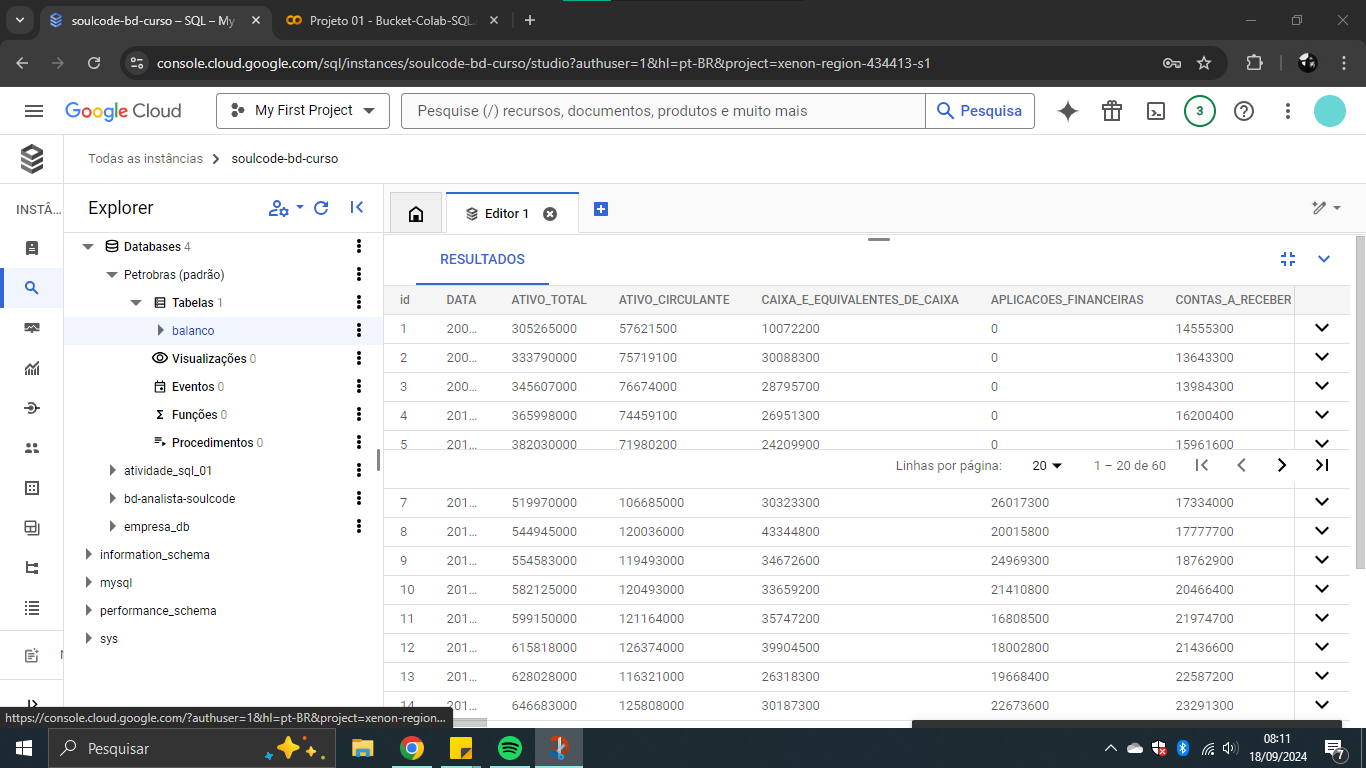